In [51]:
#Final da solução do dia 2 

import pandas as pd
import numpy as np

csv_dir = "C:/Users/barro/7DaysOfCode-AnaliseDeDados/DataFrameDesafio_3.csv"

df = pd.read_csv(csv_dir)
#df.head()
#df.info()

condition = [(df["localizacao"] >= 000) & (df["localizacao"]<100),(df["localizacao"] >= 100) & (df["localizacao"]<200),(df["localizacao"] >= 200) & (df["localizacao"]<300),(df["localizacao"] >= 300) & (df["localizacao"]<400),(df["localizacao"] >= 400) & (df["localizacao"]<500),(df["localizacao"] >= 500) & (df["localizacao"]<600),(df["localizacao"] >= 600) & (df["localizacao"]<700),(df["localizacao"] >= 700) & (df["localizacao"]<800),(df["localizacao"] >= 800) & (df["localizacao"]<900),(df["localizacao"] >= 900) & (df["localizacao"]<1000)] 


valores = ["Generalidades. Ciência e Conhecimento.", "Filosofia e Psicologia.", "Religião", "Ciência Sociais.", "Classe Vaga.", "Matemática e Ciências naturais", "Ciências Aplicadas", "Belas Artes", "Linguagem. Língua. Linguistica", "Geografia. Biografia. História."]
df["CDU"] = np.select(condition, valores)

#df.head()
#print(df.iloc[515200:517800])
df.to_csv("C:/Users/barro/7DaysOfCode-AnaliseDeDados/DataFrameDesafio_4.csv", index=None) 

In [3]:
#Inicio solução do dia 3
#importações
import matplotlib as mp
import pandas as pd
import numpy as np

#variáveis
csv_dir = "C:/Users/barro/7DaysOfCode-AnaliseDeDados/DataFrameDesafio_4.csv"

#função de conversão para datetime
def mult_to_datetime(list_column, dataframe):
    for i in list_column:
        dataframe[i] = pd.to_datetime(dataframe[i])

#importação do data frame
df = pd.read_csv(csv_dir)

print(df.info())
#conversão das colunas de datas para tipo de dados datetime
df["data_emprestimo"] = pd.to_datetime(df["data_emprestimo"])
df["data_renovacao"] = pd.to_datetime(df["data_renovacao"])
df["data_devolucao"] = pd.to_datetime(df["data_devolucao"])

#salva modificações para novo arquivo -> Salvar o dataframe para um novo arquivo gera um problema de conversão quando importado novamente
#df.to_csv("C:/Users/barro/7DaysOfCode-AnaliseDeDados/DataFrameDesafio_5.csv", index = None)


#tirar duplicatas de exemplares, para que sejam medidos apenas os exemplares
#df = df.drop_duplicates(subset=['id_exemplar'])
#tirar as duplicatas não muda basicamente nada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235117 entries, 0 to 2235116
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
 12  registro_sistema      float64
 13  CDU                   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 238.7+ MB
None


2019-12-30 18:05:30.313000
2010-01-04 08:27:33.569000
data_emprestimo
1     61053
2     66501
3     64293
4     74797
5     75982
6     79120
7     68700
8     76002
9     75603
10    76071
11    73393
12    69827
13    79696
14    79604
15    68503
16    75114
17    71474
18    68340
19    75385
20    78268
21    65686
22    79503
23    78485
24    74243
25    76500
26    78301
27    81063
28    66316
29    68222
30    67802
31    41270
Name: id_emprestimo, dtype: int64


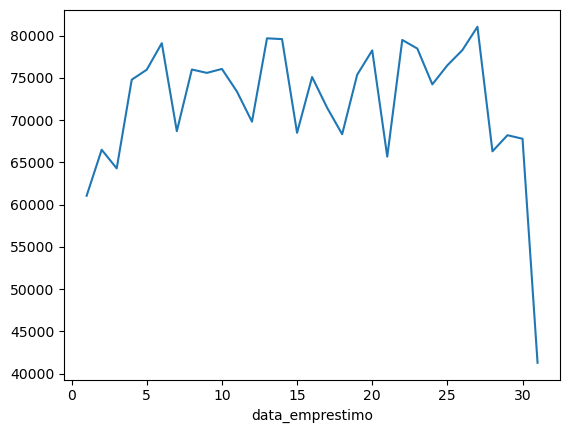

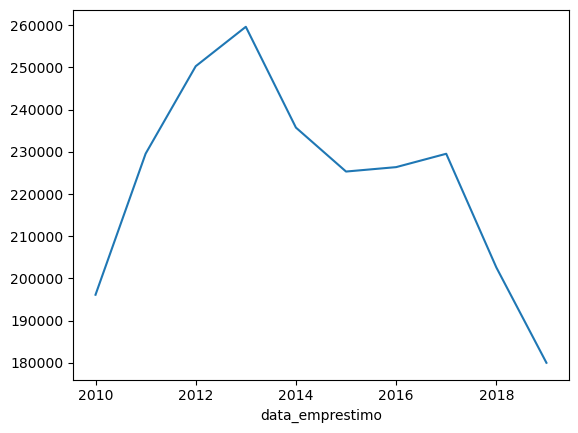

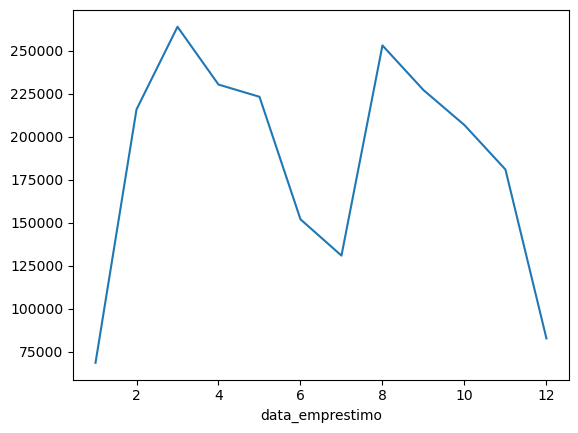

In [49]:
#importações 
import matplotlib.pyplot as plt

#este método demonstra a data mínima e a data máxima dos emprestimos, utilizado para entedimento dos dados
print(df['data_emprestimo'].max())
print(df['data_emprestimo'].min())

#esta linha agrupa os dados por mês, mas mantém separados por ano
#print(df.resample('ME', on = 'data_emprestimo').count())

#esta é outra forma de fazer a mesma coisa anterior
#print(df.groupby(pd.Grouper(key='data_emprestimo',freq='ME')).count())


#aqui é uma forma de fazer a contagem dos emprestimos mas sem separar por ano ou por mês, que é o que eu queria fazerS
#print(df.groupby(df['data_emprestimo'].dt.year).count())
#print(df.groupby(df['data_emprestimo'].dt.month).count())
print(df.groupby(df['data_emprestimo'].dt.day).count()['id_emprestimo'])
#print(df.groupby(df['data_emprestimo'].dt.day).count())
df_grupo_dia = df.groupby(df['data_emprestimo'].dt.day).count()['id_emprestimo']
df_grupo_ano = df.groupby(df['data_emprestimo'].dt.year).count()['id_emprestimo']
df_grupo_mes = df.groupby(df['data_emprestimo'].dt.month).count()['id_emprestimo']
#print(df[['id_emprestimo', 'CDU']])


df_grupo_dia.plot()
plt.show()
df_grupo_ano.plot()
plt.show()
df_grupo_mes.plot()
plt.show()
#fig,ax = plt.subplots()
#ax.bar()



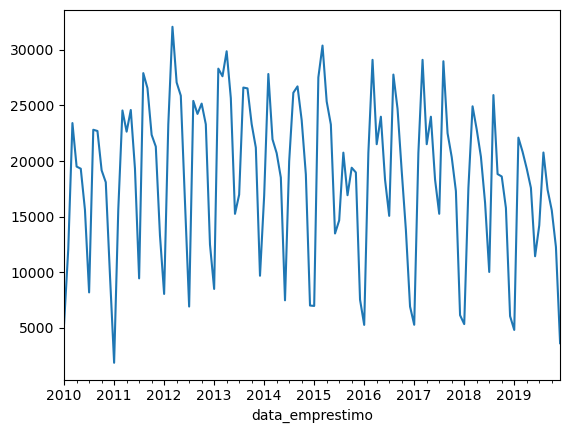

In [51]:
df_grupo_mes_2 = df.groupby(pd.Grouper(key='data_emprestimo',freq='ME')).count()['id_emprestimo']
df_grupo_mes_2.plot()
plt.show()